## Loan EDA Assignment

In [76]:
#import 
import pandas as pd
import numpy  as np

In [77]:
#import Graph libs
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#load the data file
df=pd.read_csv("loan.csv",low_memory=False)
df.shape

(39717, 111)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


**Data cleanup**

In [80]:
# find out empty columns 
nan_columns = df.isnull().sum()
nan_columns

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [81]:
empty_columns = nan_columns[nan_columns == 39717].index.to_list()

In [82]:
empty_columns

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

Looks like we have a lot of columns that are not required
many blank columns need to be dropped.

In [83]:
df.dropna(how='all', axis=1, inplace=True)
df.shape

(39717, 57)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

As we can see there are multiple columns which do not have impact on  our analysis So lets drop those columns

In [85]:
df =df.drop([ 'delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal',
  'revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt', 'total_pymnt_inv',
  'desc', 'mths_since_last_delinq','mths_since_last_record','next_pymnt_d',
  'zip_code', 'pymnt_plan','url','initial_list_status','collections_12_mths_ex_med','policy_code',
  'tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq', 'title',
  'total_rec_prncp', 'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
  'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'], axis=1) 

In [86]:
# calculating Percentage of null fields in our data set
100*df.isnull().mean()

id                      0.000000
member_id               0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.191303
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

let's examine emp_title, emp_length
Around 6%,2%  of records do not have data. Lets remove them 

In [87]:
#let's examine emp_title, emp_length
# Around 6%,2%  of records do not have data. Lets remove them 
df= df[~ (df['emp_title'].isna() | df['emp_length'].isna() )]

**let's identify the column we need to investigate** 
 - term - The number of payments on the loan. Values are in months and can be either 36 or 60. 
 - int_rate - Interest Rate on the loan 
 - installment - monthly EMI 
 - grade and sub_grade - LC assigned loan grade
 - emp_title - he job title supplied by the Borrower when applying for the loan.*
 - emp_length -Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
 - home_ownership - The homeownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER
- annual_inc - The self-reported annual income provided by the borrower during registration.
- loan_status Current status of the loan
- loan_amnt - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department -educes the loan amount, then it will be reflected in this value.
- verification_status- Indicates if income was verified by LC, not verified, or if the income source was verifie-
- purpose - A category provided by the borrower for the loan request.-
- dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, exclu-ing -ortgage and the requested LC loan, divided by the borrower’s self-re-orted monthly income.
- delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


In [88]:
## find out the Percentage of null
100*df.isnull().mean()

id                      0.00000
member_id               0.00000
loan_amnt               0.00000
funded_amnt             0.00000
funded_amnt_inv         0.00000
term                    0.00000
int_rate                0.00000
installment             0.00000
grade                   0.00000
sub_grade               0.00000
emp_title               0.00000
emp_length              0.00000
home_ownership          0.00000
annual_inc              0.00000
verification_status     0.00000
issue_d                 0.00000
loan_status             0.00000
purpose                 0.00000
addr_state              0.00000
dti                     0.00000
pub_rec_bankruptcies    1.75797
dtype: float64

In [89]:
# check the value count for employee title again 
df['emp_title'].value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Five County Assoc of Governments       1
Far Niente Winery Inc                  1
Tobyhanna Army Depot                   1
Community College of Philadelphia      1
Evergreen Center                       1
Name: count, Length: 28775, dtype: int64

In [90]:
#check the shape of the data
df.shape

(37202, 21)

In [91]:
#check the lenght of the employee 
df['emp_length'].value_counts()

emp_length
10+ years    8535
2 years      4273
< 1 year     4201
3 years      3982
4 years      3357
5 years      3177
1 year       3134
6 years      2158
7 years      1722
8 years      1435
9 years      1228
Name: count, dtype: int64

As we can see there are values in string format which we need to convert into integer format for our analysis

In [92]:
# lets convert emp_length to interger.

def replace_val(colval):
    match colval:
        case "10+ years":
            result = "10"
        case "< 1 year":
            result = "0"
        case "1 year":
            result = "1"
        case _:
            result = colval.replace("years","")

    return result.strip()

In [93]:
df['no_of_years_service']=df['emp_length'].apply(lambda x : int(replace_val(x)))

In [94]:
# lets look at  term column 
# lets convert it to number 60months 5 years and 36months as 3 years

df['loan_term'] = df['term'].apply(lambda x : int( x.replace('months','').strip())/12)

In [95]:
df['loan_amnt'].describe()

count    37202.000000
mean     11274.668029
std       7419.650588
min        500.000000
25%       5550.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

To be able to analyse on the basis of loan amount lets categorise them on the basis of loan amount
- if loan amount is less than say 5600 then its low
- if loan amount is greater then 5600 then its high and if its greater than 10000 lets say its very high loan amount

In [96]:
#lets convert loan amount into categorical value 

def loan_amount_type(n):
    if n < 5600:
        return 'low'
    elif n >=5600 and n < 10000:
        return 'medium'
    elif n >= 10000 and n < 15000:
        return 'high'
    else:
        return 'very high'

In [97]:
# lets create a new column to store the amount type 
df['loan_amount_type'] = df['loan_amnt'].apply(lambda x : loan_amount_type(x))

In [98]:
# clean the interest rate ,Lets covert interest_rate to number
df['int_rate'] = df['int_rate'].apply(lambda x : float(x.replace('%','').strip()))

In [99]:
df['int_rate'].describe()

count    37202.000000
mean        12.057666
std          3.717259
min          5.420000
25%          9.320000
50%         11.860000
75%         14.590000
max         24.400000
Name: int_rate, dtype: float64

on basis of above data we can create a new column to store the interest rate type

In [100]:
def int_rate_type(n):
    if n <= 9:
        return 'low'
    elif n > 9 and n <=14:
        return 'medium'
    else:
        return 'high'
    

In [101]:
# lets create a new column to store the amount type 
df['int_rate_type'] = df['int_rate'].apply(lambda x : int_rate_type(x))

In [102]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,no_of_years_service,loan_term,loan_amount_type,int_rate_type
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Dec-11,Charged Off,car,GA,1.00,0.0,0,5.0,low,high
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Dec-11,Fully Paid,other,CA,20.00,0.0,10,3.0,high,medium
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Dec-11,Current,other,OR,17.94,0.0,1,5.0,low,medium
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,Dec-11,Fully Paid,wedding,AZ,11.20,0.0,3,3.0,low,low
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0.0,8,5.0,medium,high


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37202 entries, 1 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37202 non-null  int64  
 1   member_id             37202 non-null  int64  
 2   loan_amnt             37202 non-null  int64  
 3   funded_amnt           37202 non-null  int64  
 4   funded_amnt_inv       37202 non-null  float64
 5   term                  37202 non-null  object 
 6   int_rate              37202 non-null  float64
 7   installment           37202 non-null  float64
 8   grade                 37202 non-null  object 
 9   sub_grade             37202 non-null  object 
 10  emp_title             37202 non-null  object 
 11  emp_length            37202 non-null  object 
 12  home_ownership        37202 non-null  object 
 13  annual_inc            37202 non-null  float64
 14  verification_status   37202 non-null  object 
 15  issue_d               37

In [104]:
# lets look at the pub_rec_bankruptcies column 
100*df.isnull().mean()

id                      0.00000
member_id               0.00000
loan_amnt               0.00000
funded_amnt             0.00000
funded_amnt_inv         0.00000
term                    0.00000
int_rate                0.00000
installment             0.00000
grade                   0.00000
sub_grade               0.00000
emp_title               0.00000
emp_length              0.00000
home_ownership          0.00000
annual_inc              0.00000
verification_status     0.00000
issue_d                 0.00000
loan_status             0.00000
purpose                 0.00000
addr_state              0.00000
dti                     0.00000
pub_rec_bankruptcies    1.75797
no_of_years_service     0.00000
loan_term               0.00000
loan_amount_type        0.00000
int_rate_type           0.00000
dtype: float64

In [105]:
#clean the pub_rec_bankruptcies , lets remove the rows with null values
df = df[~df['pub_rec_bankruptcies'].isna()] 

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36548 entries, 1 to 39680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36548 non-null  int64  
 1   member_id             36548 non-null  int64  
 2   loan_amnt             36548 non-null  int64  
 3   funded_amnt           36548 non-null  int64  
 4   funded_amnt_inv       36548 non-null  float64
 5   term                  36548 non-null  object 
 6   int_rate              36548 non-null  float64
 7   installment           36548 non-null  float64
 8   grade                 36548 non-null  object 
 9   sub_grade             36548 non-null  object 
 10  emp_title             36548 non-null  object 
 11  emp_length            36548 non-null  object 
 12  home_ownership        36548 non-null  object 
 13  annual_inc            36548 non-null  float64
 14  verification_status   36548 non-null  object 
 15  issue_d               36

Now we have cleaned the data and removed the unwanted columns. We have also converted the columns to the required format. We will now proceed with the analysis.

# Data Anaysis 

We can start with columns loan status and see what can be analysed from this

In [107]:
#lets analyse the loan status column
df['loan_status'].value_counts()

loan_status
Fully Paid     30463
Charged Off     5019
Current         1066
Name: count, dtype: int64

In order to compare loan amount with the loan status lets plot a bar graph

**Univariant Analysis**

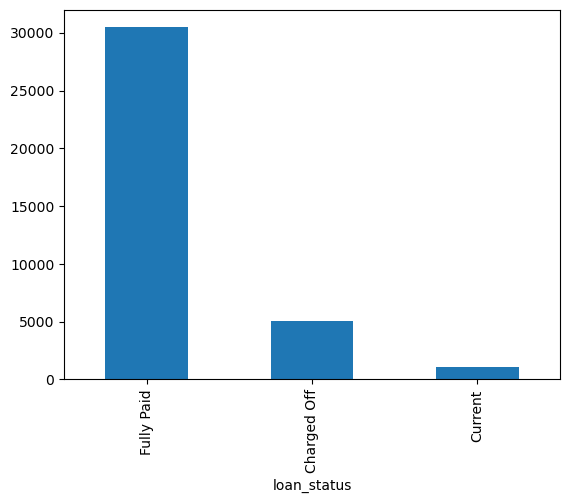

In [108]:
df['loan_status'].value_counts().plot.bar()
plt.show()

To be check defaulters we know that charged off so lets create a column where we can mark which all customers are defaulter for analysis 

In [109]:
# let create a new column for storing these staus in numbers
df['is_defaulter'] = df['loan_status'].apply(lambda x: int(1 if x=='Charged Off' else 0))

In [110]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,no_of_years_service,loan_term,loan_amount_type,int_rate_type,is_defaulter
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Charged Off,car,GA,1.00,0.0,0,5.0,low,high,1
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Fully Paid,other,CA,20.00,0.0,10,3.0,high,medium,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Current,other,OR,17.94,0.0,1,5.0,low,medium,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,Fully Paid,wedding,AZ,11.20,0.0,3,3.0,low,low,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,Fully Paid,debt_consolidation,NC,23.51,0.0,8,5.0,medium,high,0


In [111]:
# Lets find out avarage defaulter 
df['loan_status'] = df['loan_status'].astype('category')
category_counts = df['loan_status'].value_counts()

In [112]:
total_records = len(df)
average_occurrence = category_counts/total_records
average_occurrence

loan_status
Fully Paid     0.833507
Charged Off    0.137326
Current        0.029167
Name: count, dtype: float64

**Around 14% defaulter present in the dataset**

Lets categorise them into loan grades where we divide them into different group of customers according to below grade they accquire 

**Loan Grades:** 
-	A: Represents the most favorable credit quality.
-	B: Indicates good credit with moderate risk.
-	C: Suggests average credit with some risk.
-	D: Implies below-average credit with higher risk.
-	E: Signifies high risk.
-	F/G: Reserved for the riskiest borrowers.

Lets plot a bar graph to analyse the defaulter based on the grades they have

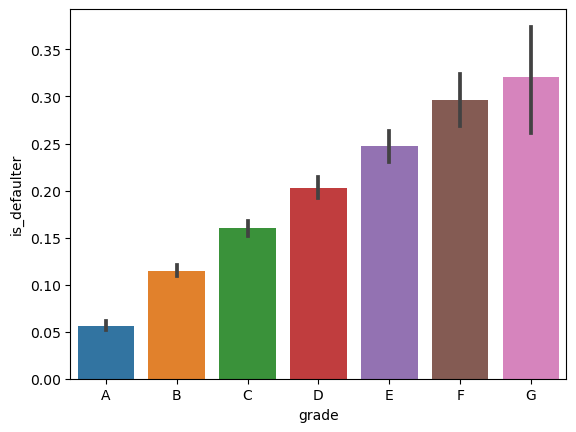

In [113]:
sns.barplot(x='grade', y='is_defaulter', data=df, order=['A','B','C','D','E','F','G'])
plt.show()

### Observation 
As we can see that grades with higher risk have more defaulters. 


**Now we can divide this more finer and divide into subgrades and plot to check and compare**

In [114]:
 #Let's comapre with subgrade 

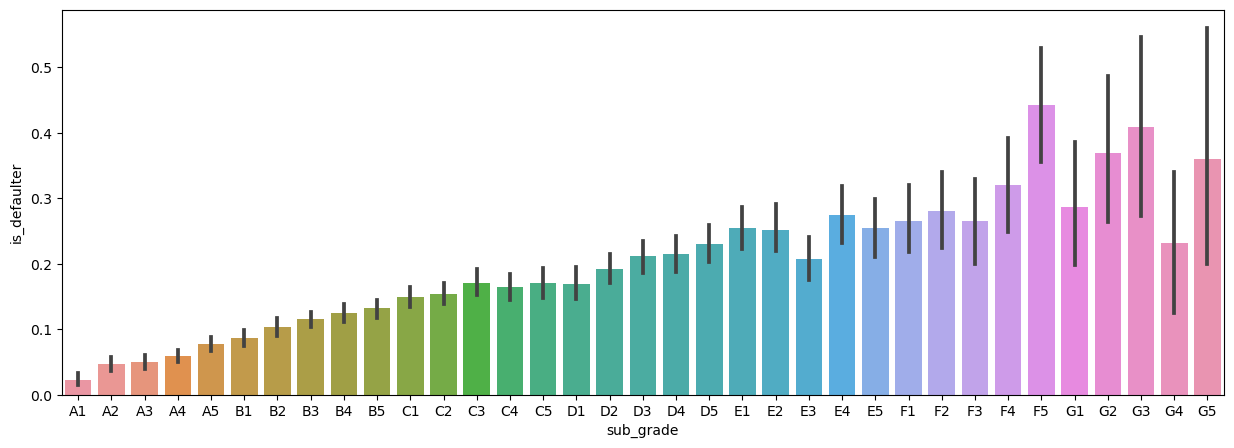

In [115]:
plt.figure(figsize=(15, 5))
sns.barplot(x='sub_grade', y='is_defaulter', data=df ,order= [ 'A1','A2','A3','A4','A5',
 'B1','B2','B3','B4','B5',
 'C1','C2','C3','C4','C5',
 'D1','D2','D3','D4','D5',
 'E1','E2','E3','E4','E5',
 'F1','F2','F3','F4','F5',
 'G1','G2','G3','G4','G5'])
plt.show()

With above we have observation that the higher the grades the highier the risk of defaulters and higher is the risk to grant loan for grades F and G

Lets now compare on the basis of loan tenure and defaulters

In [116]:
#lets compare with loan terms

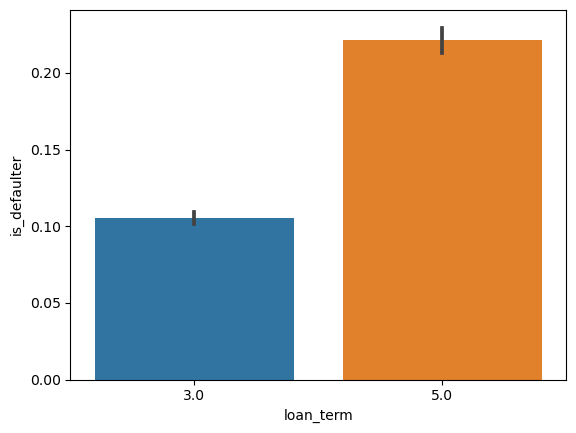

In [117]:
sns.barplot(x='loan_term', y='is_defaulter', data=df)
plt.show()

#### Observation 
As we can see the longer the term loan  the more defaulters we have

**Check on the basis of no of years of service**

In [118]:
#lets examine loan status with no_of_years_service

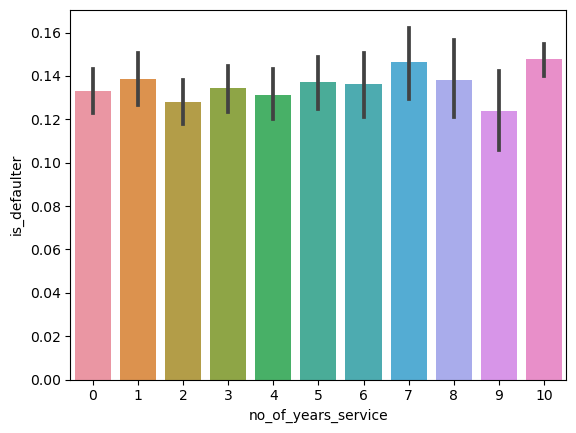

In [119]:
sns.barplot(x='no_of_years_service', y='is_defaulter', data=df)
plt.show()

#### Observation 
Looks like no of service does not influence on loan defaulters 

**lets check on the basis of verification status**

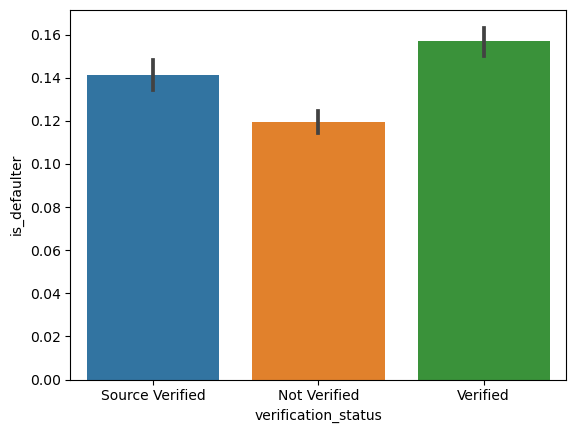

In [120]:
sns.barplot(x='verification_status', y='is_defaulter', data=df)
plt.show()

### Oberervation
We can see verified are more defaulters but it dose not conclude much

**Compare on the basis of home ownership**

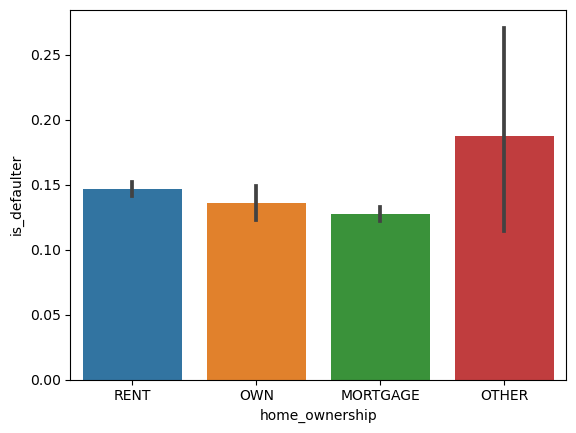

In [121]:
sns.barplot(x='home_ownership', y='is_defaulter', data=df)
plt.show()

### Obeservation 
We can see that home ownership have impacted the dfaulter list where home is not own , rented or on mortgage

**Lets check if purpose of loan has impact over the defaulter list**

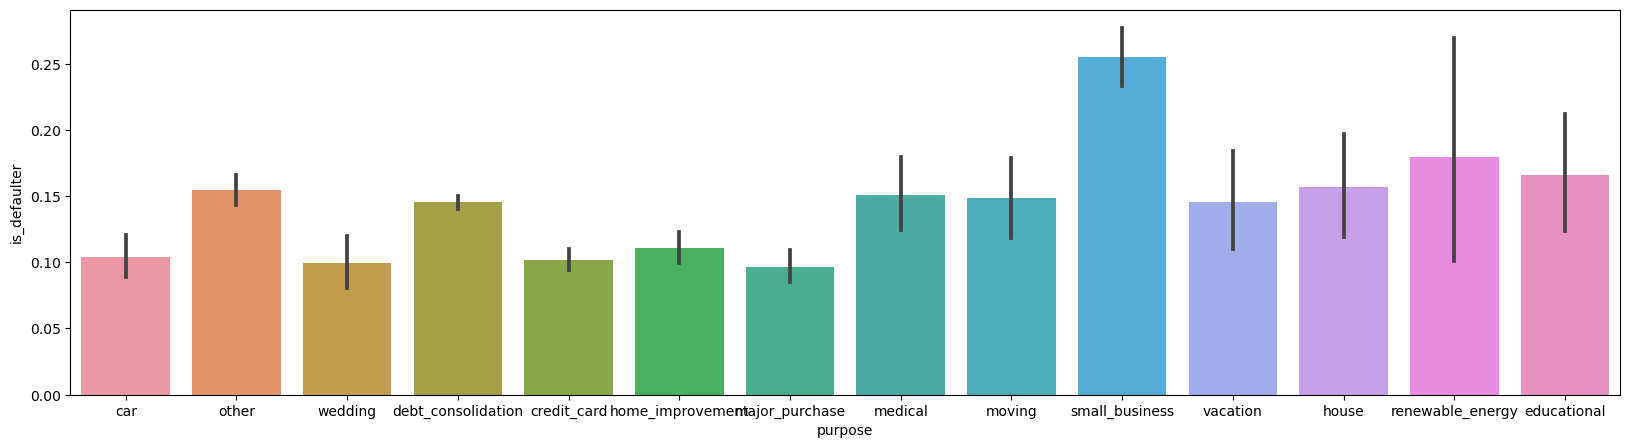

In [122]:
plt.figure(figsize=(20, 5))
sns.barplot(x='purpose', y='is_defaulter', data=df)
plt.show()

### Observation 
We can see small business tends to fall into defaulter list more then any other purpose for which loan was taken

**Compare with the loan amount type**

In [123]:
# Lets compare with  Loan amount type 

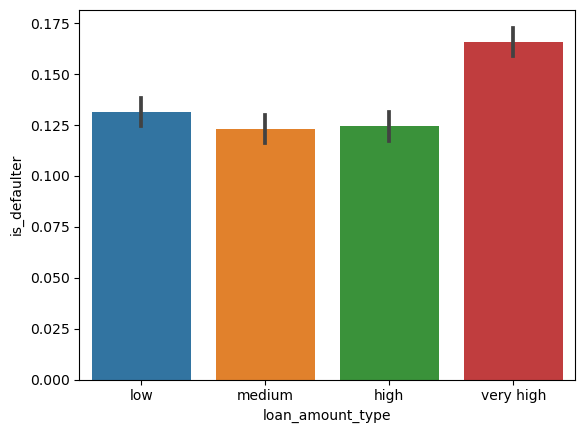

In [124]:
sns.barplot(x='loan_amount_type', y='is_defaulter', data=df, order=['low','medium','high','very high'])
plt.show()

#### Observation 
Looks like a very high loan amount will result in more defaulter 
However, we need to look at why low loan amounts have more defaulters than medium 

**Lets check on the basis of interest type**

In [125]:
# let's compare with intrest rate type

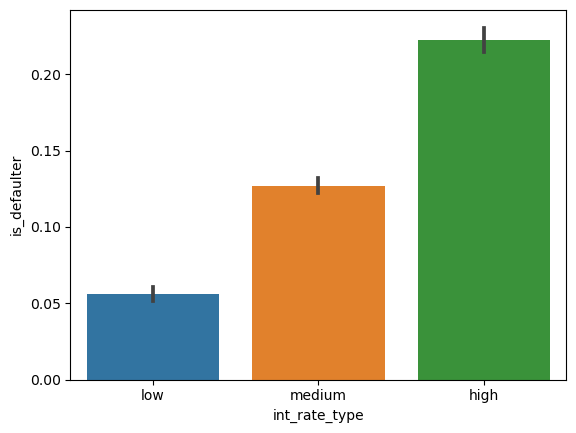

In [126]:
sns.barplot(x='int_rate_type', y='is_defaulter', data=df, order=['low','medium','high'])
plt.show()

### Observations
As we can see that the higher the interest rate the higher the chances of defaulters 

### **Based on below parameters lets calculat Debt to income ratio**

##### Loan Grades: 
-	A: Represents the most favorable credit quality.
-	B: Indicates good credit with moderate risk.
-	C: Suggests average credit with some risk.
-	D: Implies below-average credit with higher risk.
-	E: Signifies high risk.
-	F/G: Reserved for the riskiest borrowers.

##### Debt-to-Income Ratio (DTI) 
- Excellent:  DTI below 20%.
- Good: DTI between 20% and 35%.
- Fair: DTI between 35% and 50%.
- Poor: DTI above 50%.

In [127]:
def dti_type(n):
    if n <= 20:
        return 'Low Risk'
    elif n > 20 and n <=35:
        return 'Medium Risk'
    elif n > 35 and n <=50:
        return 'Fair Risk'    
    else:
        return 'High Risk'

In [128]:
# lets create a new column to store the amount type 
df['dti_type'] = df['dti'].apply(lambda x : dti_type(x))

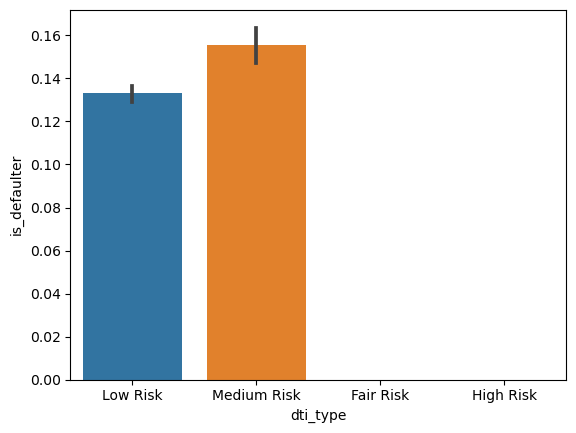

In [129]:
#now let's look at dti with defaulter 
sns.barplot(x='dti_type', y='is_defaulter', data=df, order=['Low Risk','Medium Risk','Fair Risk','High Risk'])
plt.show()

#### Observation 
Surprisingly with Low and Medium risk dti, there still are many defaulters.

**lets check based on no of years of service and segragate them as**
 - Fresher if years of experiance is less than equal 1
 - Associate if years of experiance is less then equal 5
 - Junior if years of experiance is less then equal 9
 - Senior if greater than 9 years

In [130]:
df['no_of_years_service'].describe()

count    36548.000000
mean         5.011902
std          3.542254
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: no_of_years_service, dtype: float64

In [131]:
def exp_type(n):
    if n <= 1:
        return 'Fresher'
    elif n > 1 and n <=5:
        return 'Associate'
    elif n > 5 and n <=9:
        return 'Junior'    
    else:
        return 'Senior'

In [132]:
# lets create a new column to store the amount type 
df['exp_type'] = df['no_of_years_service'].apply(lambda x : exp_type(x))

In [133]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,pub_rec_bankruptcies,no_of_years_service,loan_term,loan_amount_type,int_rate_type,is_defaulter,dti_type,exp_type
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,GA,1.00,0.0,0,5.0,low,high,1,Low Risk,Fresher
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,CA,20.00,0.0,10,3.0,high,medium,0,Low Risk,Senior
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,OR,17.94,0.0,1,5.0,low,medium,0,Low Risk,Fresher
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,AZ,11.20,0.0,3,3.0,low,low,0,Low Risk,Associate
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NC,23.51,0.0,8,5.0,medium,high,0,Medium Risk,Junior


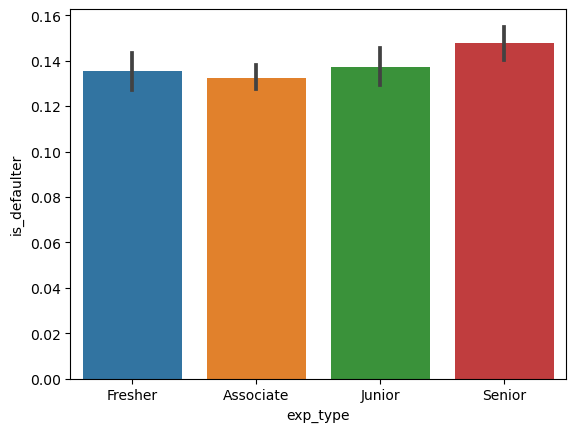

In [134]:
#now let's look at experience  with defaulter 
sns.barplot(x='exp_type', y='is_defaulter', data=df, order=['Fresher','Associate','Junior','Senior'])
plt.show()

### Observation 
Years of experiance does not impact the defaulter list

### **lets check on the basis of annual income type**
 - income less than equal to 50000 is low
 - income between 50000 and 100000 is medium
 - income between 100000 and 150000 is high
 - income above 150000 is considered as very high



In [135]:
def annual_income_type(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

In [136]:
# annual_inc
df['income_type'] = df['annual_inc'].apply(lambda x : annual_income_type(x))

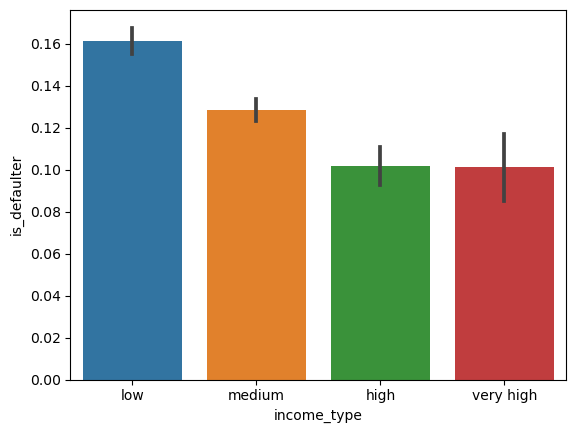

In [137]:
sns.barplot(x='income_type', y='is_defaulter', data=df, order=['low','medium','high','very high'])
plt.show()

### Observation
Lower the income higher will be the chances of loan repayment and being marked as defaulters

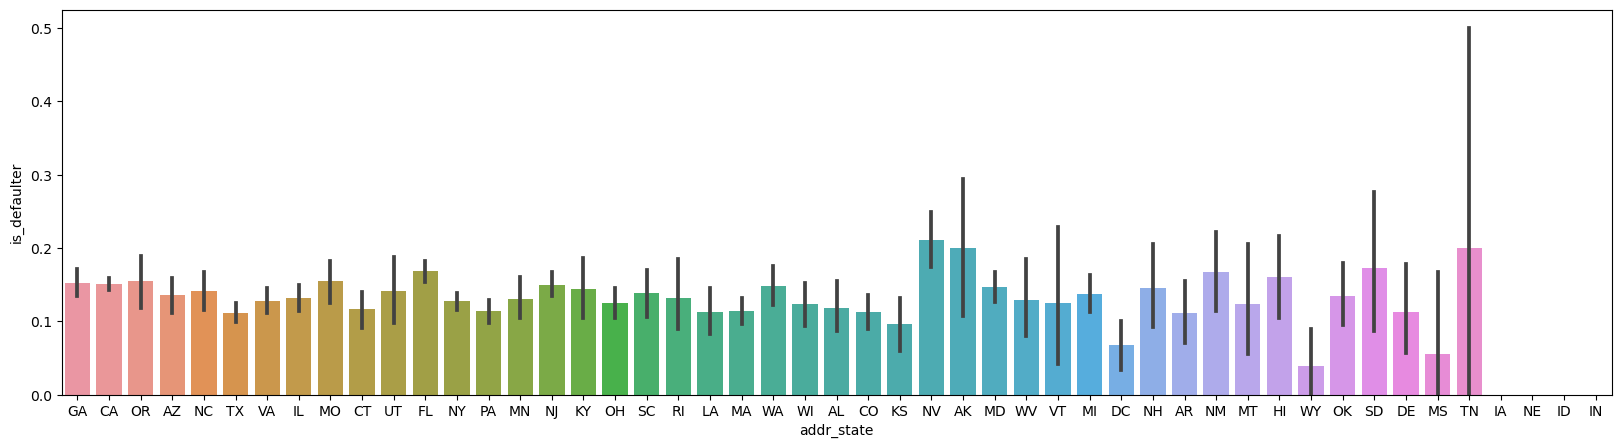

In [138]:
#lets check which state has more defautlers 
plt.figure(figsize=(20, 5))
sns.barplot(x='addr_state', y='is_defaulter', data=df)
plt.show()

#### Observation 
States like IA, NE,ID & IN have no defaulters where as NV and AK have highest defaulters

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36548 entries, 1 to 39680
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    36548 non-null  int64   
 1   member_id             36548 non-null  int64   
 2   loan_amnt             36548 non-null  int64   
 3   funded_amnt           36548 non-null  int64   
 4   funded_amnt_inv       36548 non-null  float64 
 5   term                  36548 non-null  object  
 6   int_rate              36548 non-null  float64 
 7   installment           36548 non-null  float64 
 8   grade                 36548 non-null  object  
 9   sub_grade             36548 non-null  object  
 10  emp_title             36548 non-null  object  
 11  emp_length            36548 non-null  object  
 12  home_ownership        36548 non-null  object  
 13  annual_inc            36548 non-null  float64 
 14  verification_status   36548 non-null  object  
 15  issue_d

In [140]:
df['purpose'].value_counts()

purpose
debt_consolidation    17511
credit_card            4730
other                  3597
home_improvement       2711
major_purchase         2018
car                    1445
small_business         1422
wedding                 893
medical                 636
moving                  531
house                   345
vacation                337
educational             283
renewable_energy         89
Name: count, dtype: int64

## **Lets compare all above charts with respect to other variables as bivariant**

Comparition values 
- loan_amount_type
- is_defaulter
- grade

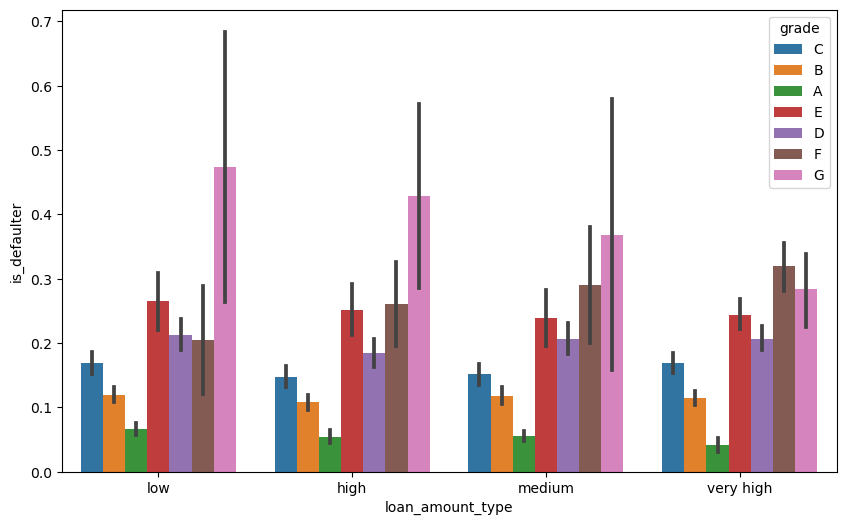

In [141]:
# Lets compare a few more variable 
plt.figure(figsize=[10, 6])
sns.barplot(x='loan_amount_type', y="is_defaulter", hue='grade', data=df)
plt.show()


**Observation**
  - Grade G is having the highest defauler list in every loan amount type segment 

Comparition values 
- loan_amount_type
- is_defaulter
- int_rate_type

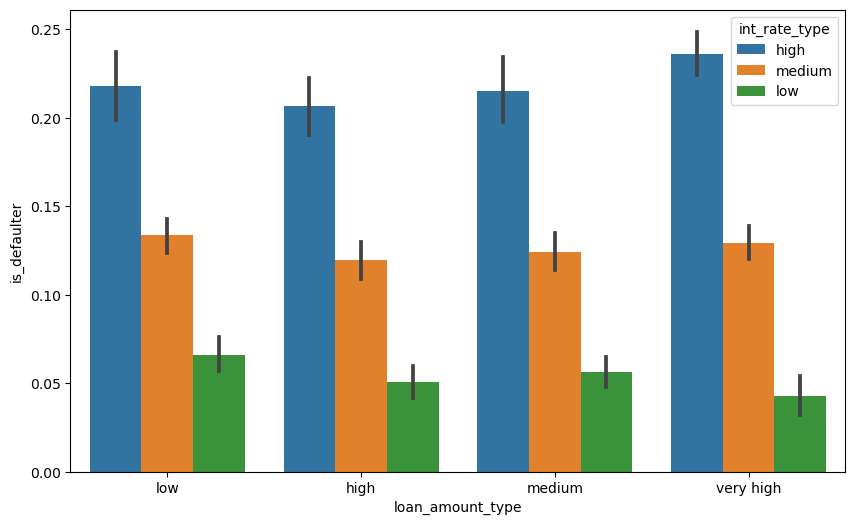

In [142]:
plt.figure(figsize=[10, 6])
sns.barplot(x='loan_amount_type', y="is_defaulter", hue='int_rate_type', data=df)
plt.show()

**Observation**
- higher the interset rate higher is the chance of defaulter list for any loan amount type

Comparition values 
- home_ownership
- is_defaulter
- grade

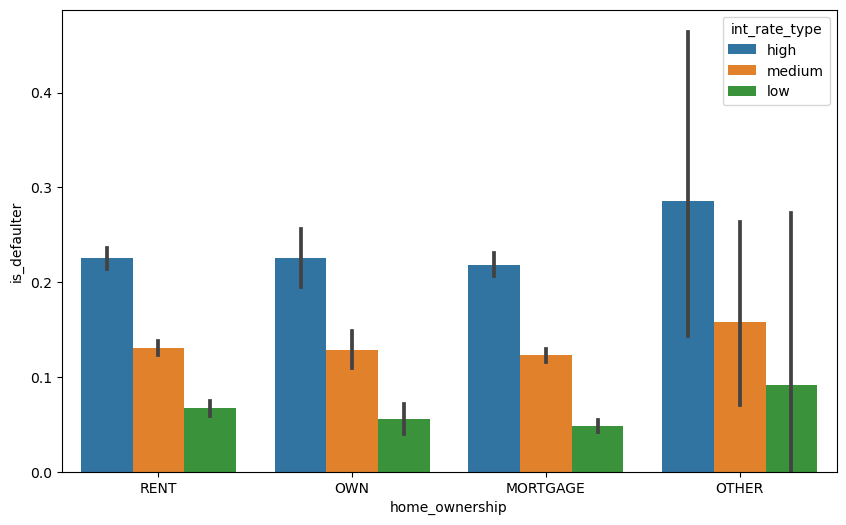

In [143]:
plt.figure(figsize=[10, 6])
sns.barplot(x='home_ownership', y="is_defaulter", hue='int_rate_type', data=df)
plt.show()

**Observation**
- every home ownership type where interset rate type is high have higher defaulter list

Comparition values state wise
- loan_amount_type
- is_defaulter
- addr_state

In [144]:
df_top_state = df[df['addr_state'].isin(['NV','AK','TN','FL','SD'])]

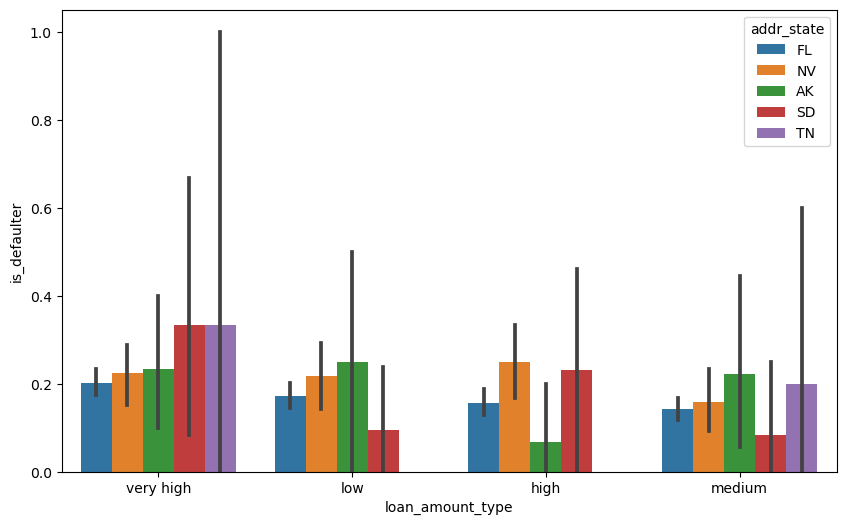

In [145]:
plt.figure(figsize=[10, 6])
sns.barplot(x='loan_amount_type', y="is_defaulter", hue='addr_state', data=df_top_state)
plt.show()

**Observation**
- FL and NV state are consistently having defaulter lists compared to other state

Comparition values state wise
- income_type
- is_defaulter
- addr_state

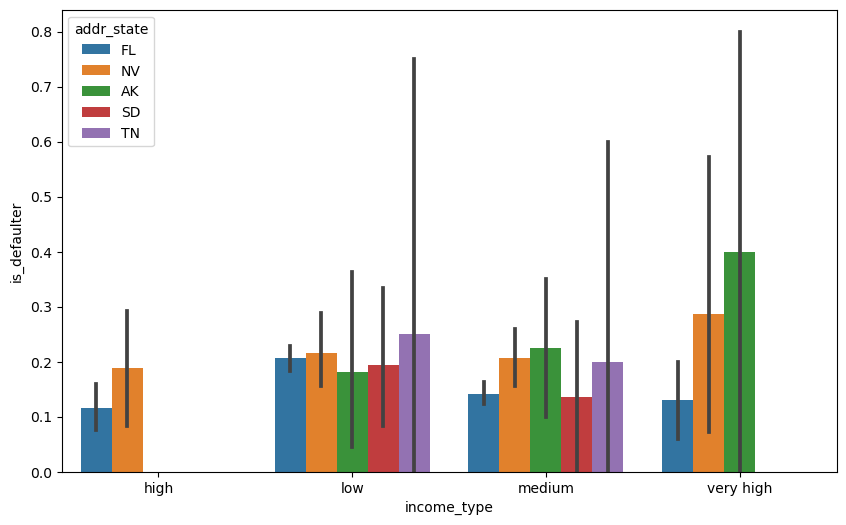

In [146]:
plt.figure(figsize=[10, 6])
sns.barplot(x='income_type', y="is_defaulter", hue='addr_state', data=df_top_state)
plt.show()

**Observation**
- Based on this chart we are not getting any clear picture

Comparition values
- income_type
- is_defaulter
- loan_amount_type

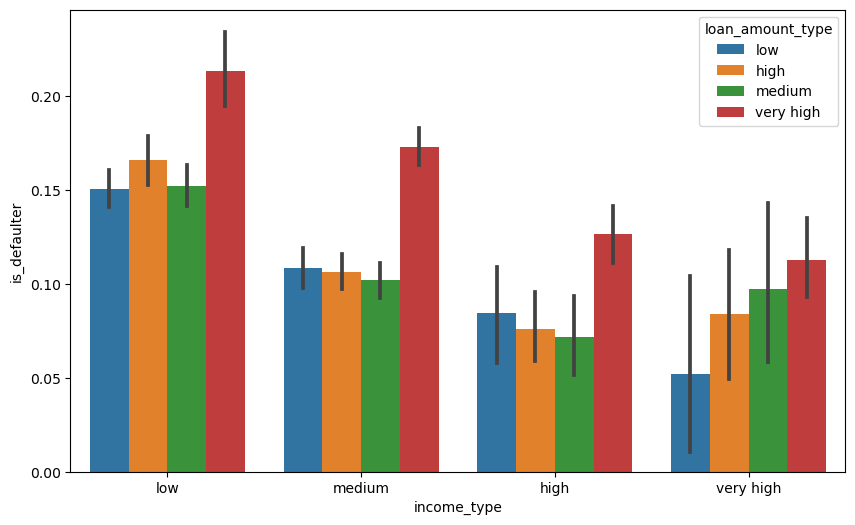

In [147]:
plt.figure(figsize=[10, 6])
sns.barplot(x='income_type', y="is_defaulter", hue='loan_amount_type', data=df)
plt.show()

**Observation**
- lower the income and higer the amount tends to increase the chances of defaulter list

Comparition values 
- Income Type
- DTI ( debt to income ratio)
- Loan Amount Type

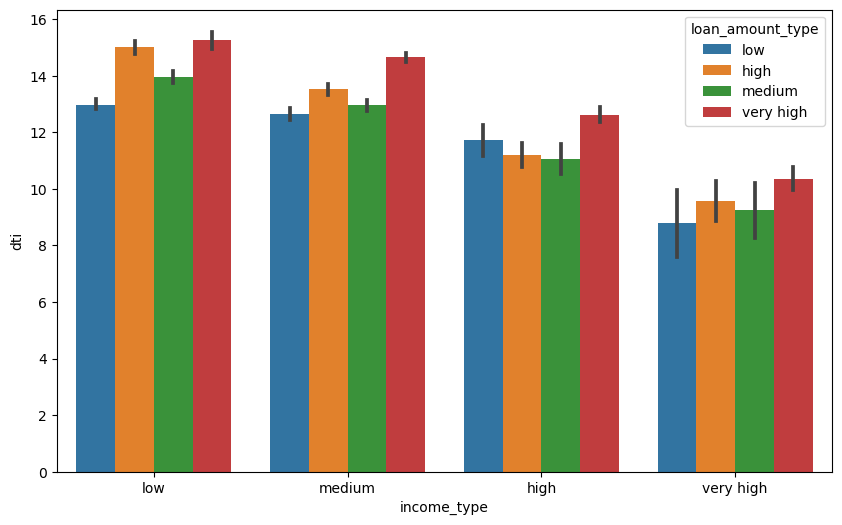

In [148]:
plt.figure(figsize=[10, 6])
sns.barplot(x='income_type', y="dti", hue='loan_amount_type', data=df)
plt.show()

**Observation**
- lower the income and higer the amount tends to increase the chances of defaulter list

Comparition values 
- Income Type
- is_defaulter
- Purpose

In [149]:
df_mainpurpose =df[ df['purpose'].isin(['debt_consolidation','credit_card','other','home_improvement','major_purchase','car','small_business']) ]    

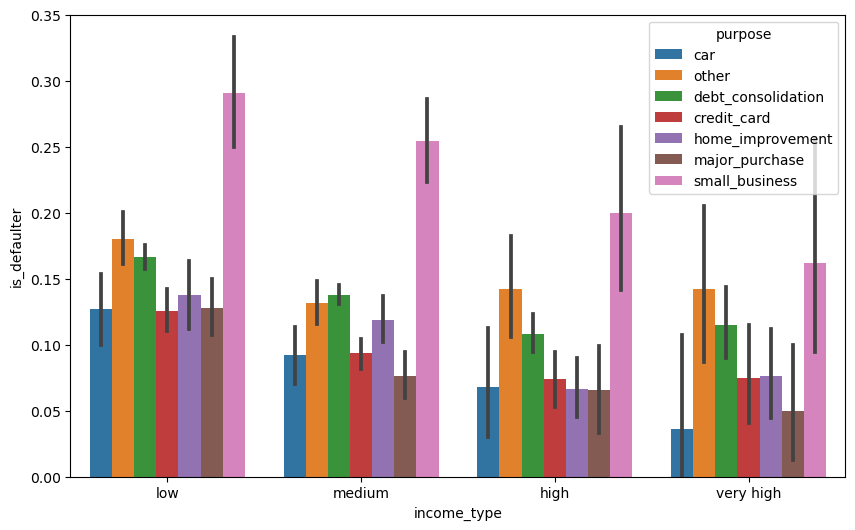

In [150]:
plt.figure(figsize=[10, 6])
sns.barplot(x='income_type', y="is_defaulter", hue='purpose', data=df_mainpurpose)
plt.show()

**Observation**
- Small business with low income tends have higher chance to fall in defaulter list 